In [10]:
#pip install transformation-tree into your env to install the package from pip
from transformation_tree.tree import Node, TTree, Pipeline
from transformation_tree.preprocessing import *
from transformation_tree.forecasting import *
from transformation_tree.stats_and_vis import *

# Demo

#### Define operators

In [32]:
def load_data_op():
    return read_file("./time_series_data/1_temperature_test.csv")

# Define nodes for pipeline
root = Node(load_data_op)
op1 = Node(plot_ts)
op2 = Node(denoise)
op3 = Node(impute_missing_data)
op4 = Node(plot_ts)
op5 = Node(histogram)

#### Initialize TTree & Add Nodes

In [33]:
tree = TTree("Transformation Tree", root)
print(tree)

load_data_op (0)



#### Insert Nodes (potential pipeline)

In [36]:
# Add nodes to the tree
tree.add_node(root, op1)
tree.add_node(op1, op2)
tree.add_node(op2, op3)
tree.add_node(op3, op4)
tree.add_node(op4, op5)
print(tree)

load_data_op (0)
└── plot_ts (6)
    └── denoise (7)
        └── impute_missing_data (8)
            └── plot_ts (9)
                └── histogram (10)



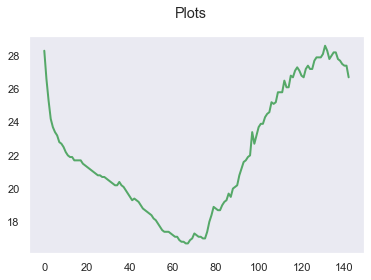

DENOISE
0      28.30
1      27.45
2      26.60
3      25.95
4      25.30
       ...  
138    21.10
139    21.15
140    21.20
141    21.20
142    21.20
Name: 28.4, Length: 143, dtype: float64

IMPUTE_MISSING_DATA
0      28.30
1      27.45
2      26.60
3      25.95
4      25.30
       ...  
138    21.10
139    21.15
140    21.20
141    21.20
142    21.20
Name: 28.4, Length: 143, dtype: float64



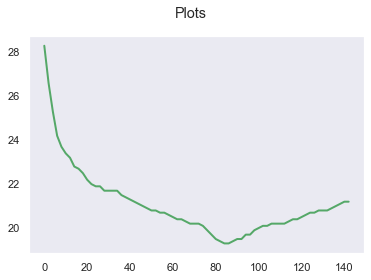

AttributeError: module 'seaborn' has no attribute 'histplot'

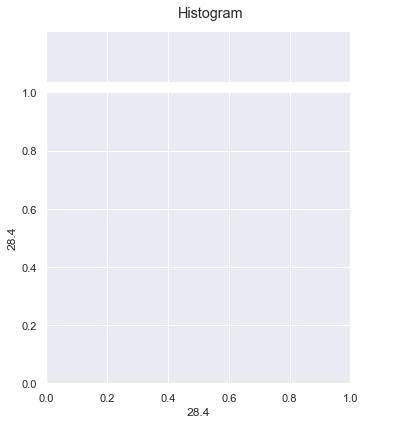

In [38]:
tree.execute_tree()